In [1]:
!pip install requests beautifulsoup4



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time


In [21]:
url = 'https://www.airlinequality.com/airline-reviews/british-airways/'
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

# 获取网页内容
response = requests.get(url, headers=headers)

# 检查请求是否成功
if response.status_code == 200:
    page_content = response.content
else:
    print(f"Failed to retrieve the page. Status code: {response.status_code}")


In [22]:
# 解析网页内容
soup = BeautifulSoup(page_content, 'html.parser')

# 查看页面的结构，找到评论所在的部分


In [23]:
# 提取所有包含评论内容的div标签
reviews = soup.find_all('div', class_='text_content')

# 创建一个列表来保存所有的评论
review_list = []

# 遍历所有找到的评论，提取文本
for review in reviews:
    review_text = review.get_text(strip=True)
    review_list.append(review_text)

# 查看前几个评论
for i, review in enumerate(review_list[:5]):
    print(f"Review {i+1}: {review}\n")


Review 1: ✅Trip Verified|   Appalling service with failing defective fleet of A380 aircraft. Flown four times on this route or return and significant delays of 2 to 26 hours every time. BA56 boarded 6:20pm on 13 October. Flight cancelled for technical reasons. Six hours to return through customs and recover bag. No BA management at all at Johannesburg that night. Further four hours to organise a hotel and transfer with queues of 300 people to check in. Room eventually accessed 4:30am No attempt to re-schedule or assist - Pilot trying to announce process.

Review 2: ✅Trip Verified| British Airways charge you for the pleasure of choosing your seat and I had been put at the very back of Club which turned out to be an advantage because it meant I could get to the seat without having to climb over anybody. The seat was clean but as I later discovered that the foldout section would not stay up and your feet dangled over the edge when the bed was extended. After boarding was complete we were 

In [24]:
all_reviews = []
max_pages = 20

for page in range(1, max_pages + 1):
    url = f'https://www.airlinequality.com/airline-reviews/british-airways/page/{page}/'
    response = requests.get(url, headers=headers)
    
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        reviews = soup.find_all('div', class_='text_content')
        
        for review in reviews:
            all_reviews.append(review.get_text(strip=True))
        time.sleep(2)
    else:
        print(f"Failed to retrieve page {page}. Status code: {response.status_code}")
df_reviews = pd.DataFrame(all_reviews, columns=['Review'])
print(df_reviews.head())
df_reviews.to_csv('skytrax_reviews.csv', index=False)


                                              Review
0  ✅Trip Verified|   Appalling service with faili...
1  ✅Trip Verified| British Airways charge you for...
2  ✅Trip Verified| What is wrong with you guys? P...
3  ✅Trip Verified|   We booked two business class...
4  ✅Trip Verified| I’ve flown with many airlines,...


In [25]:
df_reviews.shape

(200, 1)

## Cleaning and formatting data

In [26]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob
from gensim import corpora, models

# download from nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/evayang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/evayang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/evayang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [42]:
# clean data
def clean_text_custom(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove special characters and numbers
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Convert text to lowercase
    text = text.lower()
    # Remove specific custom words
    custom_stopwords = ['trip','verified','british','airway','ba','flight']  # Add any other words you want to remove
    # Tokenize text
    words = word_tokenize(text)
    # Remove both stopwords and custom stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words and word not in custom_stopwords]
    # Join words back into one string
    return ' '.join(words)



df_reviews['cleaned_review'] = df_reviews['Review'].apply(clean_text_custom)


In [43]:
df_reviews.head(20)

,Review,cleaned_review,sentiment,sentiment_category
0,✅Trip Verified| Appalling service with faili...,appalling service failing defective fleet airc...,0.008333,positive
1,✅Trip Verified| British Airways charge you for...,airways charge pleasure choosing seat put back...,0.165109,positive
2,✅Trip Verified| What is wrong with you guys? P...,wrong guys people pay lots money business clas...,0.022222,positive
3,✅Trip Verified| We booked two business class...,booked two business class seat airways july se...,-0.575000,negative
4,"✅Trip Verified| I’ve flown with many airlines,...",ive flown many airlines recent experience airw...,0.100964,positive
5,✅Trip Verified| I recently flew from New Yor...,recently flew new york back london wasnt first...,0.185782,positive
6,Not Verified| BA business class in Europe ha...,business class europe seat economy simply empt...,0.062381,positive
7,✅Trip Verified| Our flight started in Seattle ...,started seattle wa heading lisbon portugal hou...,0.030517,positive
8,✅Trip Verified| British Airways Flight from ...,airways edinburgh got delayed h min connecting...,-0.150000,negative
9,✅Trip Verified| British Airways World Travel...,airways world traveller plus premium economy p...,0.257667,positive


## sentiment analysis

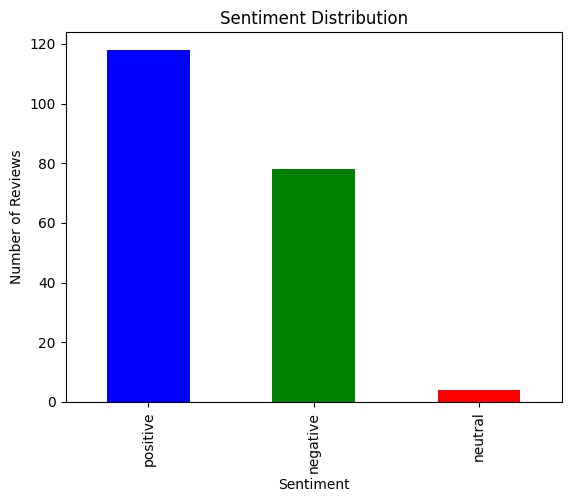

In [44]:
def sentiment_analysis(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

df_reviews['sentiment'] = df_reviews['cleaned_review'].apply(sentiment_analysis)
df_reviews['sentiment_category'] = df_reviews['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))
df_reviews['sentiment_category'].value_counts().plot(kind='bar', title='Sentiment Distribution', color=['blue', 'green', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()


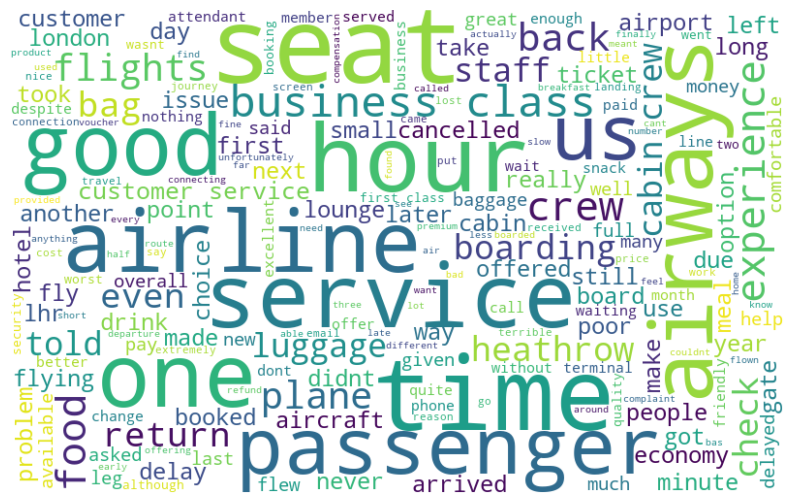

In [45]:
all_words = ' '.join([text for text in df_reviews['cleaned_review']])
wordcloud = WordCloud(width=800, height=500, max_font_size=110, background_color='white').generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [46]:

df_reviews['tokenized_review'] = df_reviews['cleaned_review'].apply(word_tokenize)
dictionary = corpora.Dictionary(df_reviews['tokenized_review'])
corpus = [dictionary.doc2bow(text) for text in df_reviews['tokenized_review']]
lda_model = models.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=10)
topics = lda_model.print_topics(num_words=5)
for idx, topic in topics:
    print(f"Topic {idx+1}: {topic}")
df_reviews.to_csv('cleaned_reviews_with_analysis.csv', index=False)

Topic 1: 0.009*"class" + 0.008*"business" + 0.008*"time" + 0.007*"crew" + 0.006*"seats"
Topic 2: 0.009*"service" + 0.008*"airways" + 0.006*"time" + 0.005*"customer" + 0.005*"hours"
Topic 3: 0.009*"crew" + 0.008*"service" + 0.008*"cabin" + 0.006*"food" + 0.005*"one"
